In [ ]:
print("Hello")

Hello


B109110301 張晉霖 CIFAR-100 實作

In [2]:
from tensorflow.keras.datasets import cifar100

In [3]:
# Load CIFAR-100 data
(input_train, target_train), (input_test, target_test) = cifar100.load_data()

169001437/169001437 [==============================] - 6s 0us/step


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 32, 32, 256)       7168      
                                                                 
 batch_normalization_27 (Bat  (None, 32, 32, 256)      1024      
 chNormalization)                                                
                                                                 
 activation_27 (Activation)  (None, 32, 32, 256)       0         
                                                                 
 conv2d_25 (Conv2D)          (None, 32, 32, 256)       590080    
                                                                 
 batch_normalization_28 (Bat  (None, 32, 32, 256)      1024      
 chNormalization)                                                
                                                                 
 activation_28 (Activation)  (None, 32, 32, 256)      

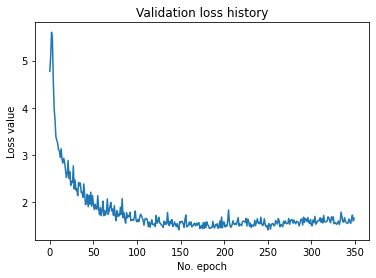

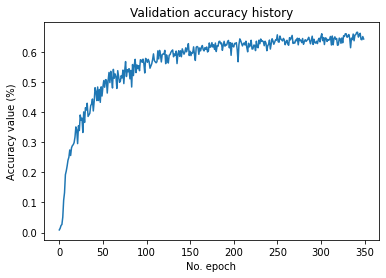

In [7]:
from keras.models import Sequential
from keras.layers.convolutional import Conv2D
from keras.layers.pooling import MaxPool2D
from keras.layers.core import Dense,Activation,Dropout,Flatten
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.initializers import RandomNormal, Constant
import matplotlib.pyplot as plt

# Model configuration
batch_size = 64
img_width, img_height, img_num_channels = 32, 32, 3

no_classes = 100
no_epochs = 350
validation_split = 0.2
verbosity = 1

# Load CIFAR-100 data
(input_train, target_train), (input_test, target_test) = cifar100.load_data()

# Determine shape of the data
input_shape = (img_width, img_height, img_num_channels)

# Parse numbers as floats
input_train = input_train.astype('float32')
input_test = input_test.astype('float32')
train_images = input_train.astype('float32')/255
test_images = input_test.astype('float32')/255

# Normalize data
input_train = input_train / 255
input_test = input_test / 255



from tensorflow.keras.utils import to_categorical
train_labels = to_categorical(target_train)
test_labels = to_categorical(target_test)

# Create the model
model = Sequential()
 
model.add(Conv2D(256,(3,3),padding='same',input_shape=(32,32,3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(256,(3,3),padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.2))
 
model.add(Conv2D(512,(3,3),padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(512,(3,3),padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(512,(3,3),padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(512,(3,3),padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(512,(3,3),padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(512,(3,3),padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(1024))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization(momentum=0.95, 
        epsilon=0.005,
        beta_initializer=RandomNormal(mean=0.0, stddev=0.05), 
        gamma_initializer=Constant(value=0.9)))
model.add(Dense(100,activation='softmax'))
model.summary()




from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Configuration for creating new images
train_datagen = ImageDataGenerator(
    rotation_range=20,
    horizontal_flip=True,
)

input_train, input_validation, target_train, target_validation = train_test_split(train_images, train_labels, test_size=0.2, random_state=93)
train_datagen.fit(input_train)
     

# Configure the model for training
from tensorflow.keras import optimizers
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=1e-4),
              metrics=['accuracy'])




# Fit data to model
history = model.fit(train_datagen.flow(input_train, target_train,
            batch_size=batch_size),
            steps_per_epoch=100,
            epochs=no_epochs,
            verbose=verbosity,
            validation_data=(input_validation, target_validation))

# Generate generalization metrics
score = model.evaluate(test_images, test_labels)
print(f'accuracy on test set: {model.metrics_names[1]} of {score[1]*100}')

# Visualize history
# Plot history: Loss
plt.plot(history.history['val_loss'])
plt.title('Validation loss history')
plt.ylabel('Loss value')
plt.xlabel('No. epoch')
plt.show()

# Plot history: Accuracy
plt.plot(history.history['val_accuracy'])
plt.title('Validation accuracy history')
plt.ylabel('Accuracy value (%)')
plt.xlabel('No. epoch')
plt.show()

Reference:
https://github.com/LeoTungAnh/CNN-CIFAR-100    


https://github.com/christianversloot/machine-learning-articles/blob/main/how-to-build-a-convnet-for-cifar-10-and-cifar-100-classification-with-keras.md
